In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [91]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
# Drop the 'Cabin' column
df = df.drop(columns=['Cabin'])
df = df.drop(columns=['Name'])
df = df.drop(columns=['Ticket'])


In [93]:
# Fill missing 'Age' values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())


In [94]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [95]:
# Fill missing 'Embarked' values with the mode (most frequent value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [97]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [98]:
print(df.columns)
df

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [99]:
# One-Hot Encode 'Sex' (Creates 'Sex_0' and 'Sex_1')
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)


In [100]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [101]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,True,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,True
888,889,0,3,28.0,1,2,23.4500,False,False,True
889,890,1,1,26.0,0,0,30.0000,True,False,False


In [102]:
# Select relevant features
X=df.drop('Survived',axis=1)
y=df['Survived']


In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['Age', 'Fare']
X[num_features] = scaler.fit_transform(X[num_features])


In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [105]:
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [106]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred= lr.predict(X_test)

/Users/kshitizgupta/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


acc_score_basic 0.7932960893854749
precision_score_basic 0.7666666666666667
recall_score_basic 0.6666666666666666
f1_score_basic 0.7131782945736435

confusion_matrix_basic 
 [[96 14]
 [23 46]]



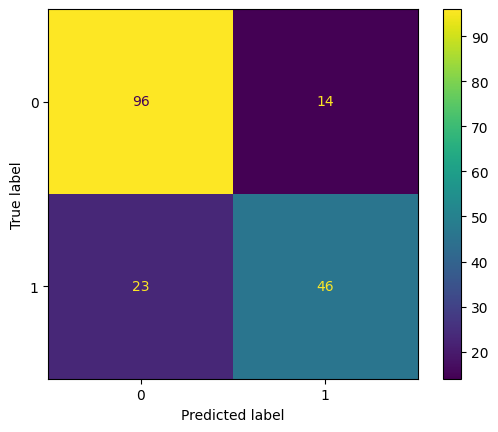

In [107]:
print('acc_score_basic',accuracy_score(y_test,y_pred))
print('precision_score_basic',precision_score(y_test,y_pred))
print('recall_score_basic',recall_score(y_test,y_pred))
print('f1_score_basic',f1_score(y_test,y_pred))
print()
print('confusion_matrix_basic \n',confusion_matrix(y_test,y_pred))
print()
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.show()

In [108]:
import pickle
pickle.dump(lr,open('model_titanic.pkl','wb'))